In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import datetime
from IPython.display import Markdown
from datetime import datetime
import textwrap

# DNN for forecasting
from keras.models import Sequential
from keras.layers import Dense

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Năm 3/y3  Học Kỳ 2  /BA/Data/AMZN.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [6]:
# Xem data 
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,159662000,0.0,0.0
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,139512000,0.0,0.0
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,183652000,0.0,0.0
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,159864000,0.0,0.0
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,177628000,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-25 00:00:00-04:00,116.629997,116.870003,114.309998,115.000000,66496700,0.0,0.0
2023-05-26 00:00:00-04:00,116.040001,121.500000,116.019997,120.110001,96779900,0.0,0.0
2023-05-30 00:00:00-04:00,122.370003,122.919998,119.860001,121.660004,64314800,0.0,0.0


In [7]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = df[['Close']]
df1=df.reset_index()['Close']

In [8]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [10]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [11]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
output_features = 1  # We are only predicting the "close" price column

In [13]:
from tensorflow.keras.layers import Dense, Dropout

In [14]:
#8. Bulit Deep Feedforward Neural Network model
# Define the model
model = Sequential()

# Add a hidden layer
model.add(Dense(128, activation='relu', input_shape=(time_step,)))
Dropout(0.2),

# Add a hidden layer
model.add(Dense(64, activation='relu'))
Dropout(0.2),

# Add a hidden layer
model.add(Dense(32, activation='relu'))
Dropout(0.2),

# Add a dense output layer
model.add(Dense(1))

In [15]:
#compile the model with mean squared error (MSE) as the loss function and Adam optimizer as the optimizer
model.compile(loss='mse', optimizer='adam')

In [16]:
# 9. Fit mô hình với dữ liệu train
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, ytest))

Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 0.1350 - val_loss: 0.0419
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0234
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0261
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0211
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0142
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0103
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0083
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0070
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0061
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0065
Epoch 11

In [18]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 26ms/step


In [19]:
#11. Chuẩn hóa dữ liệu y_pred, và y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [20]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))
ytest

yval = scaler.inverse_transform(yval.reshape(-1, 1))
yval

array([[113.40000153],
       [115.5       ],
       [118.15000153],
       [116.25      ],
       [115.01000214],
       [114.98999786],
       [116.75      ],
       [115.        ],
       [120.11000061],
       [121.66000366],
       [120.58000183]])

In [21]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 3.682139913657423
Testing RMSE: 6.238868570608915


In [22]:
from sklearn.metrics import mean_absolute_percentage_error

# Tính toán MAPE
mape = mean_absolute_percentage_error(y_pred, ytest)

print("MAPE:", mape)


MAPE: 0.04401025044142187


In [23]:
from sklearn.metrics import mean_absolute_error

# Tính toán MAE
mae = mean_absolute_error(y_pred, ytest)

print("MAE:", mae)


MAE: 5.0341650592394105


In [24]:
# Use the trained model to make predictions for the next 30 days
last_30_days = df['Close'].tail(time_step).values.reshape(1, -1)
predictions = []
for i in range(30):
    prediction = model.predict(last_30_days)[0][0]
    predictions.append(prediction)
    last_30_days = np.append(last_30_days[:,1:], [[prediction]], axis=1)

1/1 [==============================] - 0s 22ms/step


In [25]:
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1,1))

In [26]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[11:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=81
i=0
while(i<30):
    
    if(len(temp_input)>81):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        #x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        #x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.11067039 0.13317022 0.17996259 0.18157613 0.20712378 0.18856816
 0.18327932 0.16732329 0.19932501 0.20174528 0.19098843 0.19869753
 0.21698424 0.24405569 0.22890647 0.25203371 0.27014116 0.33970235
 0.25436439 0.24351787 0.24289039 0.22442443 0.20819942 0.20255208
 0.21985274 0.22128695 0.23437455 0.20739269 0.19887678 0.17539097
 0.18623748 0.18650639 0.16570976 0.16804044 0.17225356 0.15378753
 0.15342896 0.17825947 0.16795078 0.16615799 0.16947465 0.15450467
 0.14087932 0.15611821 0.17808015 0.18991272 0.22433477 0.2145639
 0.20344848 0.22944429 0.21232289 0.21241254 0.20721337 0.20640664
 0.19923535 0.22621722 0.24190434 0.25346799 0.24557964 0.25938424
 0.23383666 0.24244216 0.24342821 0.22325906 0.20452419 0.24548998
 0.24647603 0.24853773 0.24459358 0.26252172 0.25812928 0.2863661
 0.27964305 0.24701385 0.26861729 0.31200334 0.27283034 0.24235257
 0.25651574 0.25669506 0.25983247 0.27471286 0.27623673 0.28331835
 0.31532007 0.33315855 0.31594756 0.32437373 0.34409

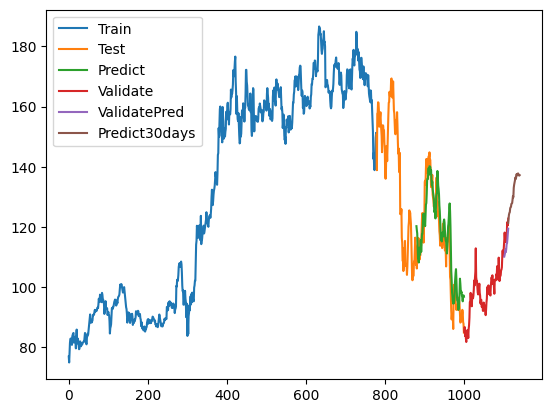

In [27]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()